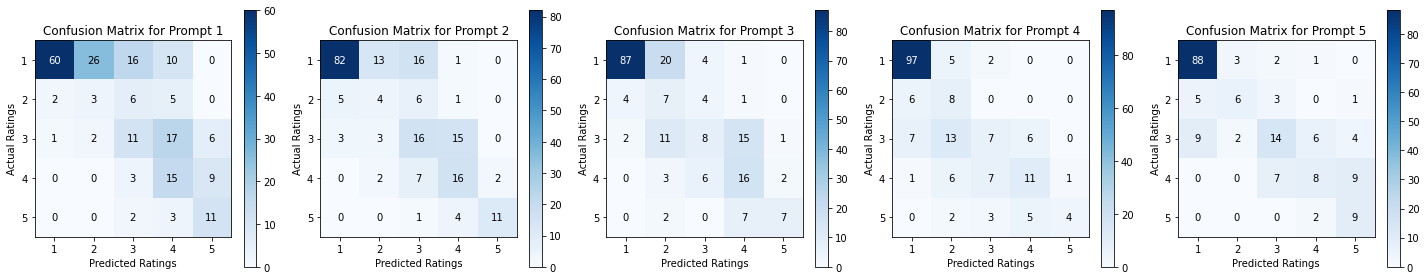

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

data = pd.read_excel('confusion matrix.xlsx')
prompts = ['Prompt 1', 'Prompt 2', 'Prompt 3', 'Prompt 4', 'Prompt 5']

fig, axes = plt.subplots(nrows=1, ncols=len(prompts), figsize=(20, 4))  

for idx, prompt in enumerate(prompts):
    if prompt in data.columns:
        data['Ground Truth'] = pd.to_numeric(data['Ground Truth'], errors='coerce')
        data[prompt] = pd.to_numeric(data[prompt], errors='coerce')
        temp_data = data.dropna(subset=['Ground Truth', prompt])
        conf_matrix = confusion_matrix(temp_data['Ground Truth'], temp_data[prompt])
        im = axes[idx].imshow(conf_matrix, interpolation='nearest', cmap='Blues')
        axes[idx].figure.colorbar(im, ax=axes[idx])
        axes[idx].set(xticks=np.arange(conf_matrix.shape[1]),
                      yticks=np.arange(conf_matrix.shape[0]),
                      xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5],
                      title=f'Confusion Matrix for {prompt}',
                      ylabel='Actual Ratings',
                      xlabel='Predicted Ratings')
        for i in range(conf_matrix.shape[0]):
            for j in range(conf_matrix.shape[1]):
                axes[idx].text(j, i, conf_matrix[i, j],
                               ha="center", va="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")
    else:
        axes[idx].set_visible(False)

plt.tight_layout()
plt.show()
